# Wine project good or bad

## Problem Statement: Given a set of features about a wine, such as the fixed acidity, volatile acidity, citric acid,residual sugar, chlorides,free sulfur dioxide,total sulfur dioxide, density, pH, sulphates, alcohol, classify the wine as good or bad.

# Install and load the data the latest version of Tenserflow and Keras Print their versions

In [1]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


# Tenserflow version 

In [2]:
import tensorflow
tensorflow.__version__

'2.12.0'

# Read the dataset

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv(r"D:\dataset EXCEl\wine.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
# Descriptive Statistics Numeric variables
df.describe(exclude='object')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

In [7]:
df.describe(include='object').T

count unique   top freq
quality  1599      2  good  855

<AxesSubplot:title={'center':'Wine Quality Countplot'}>

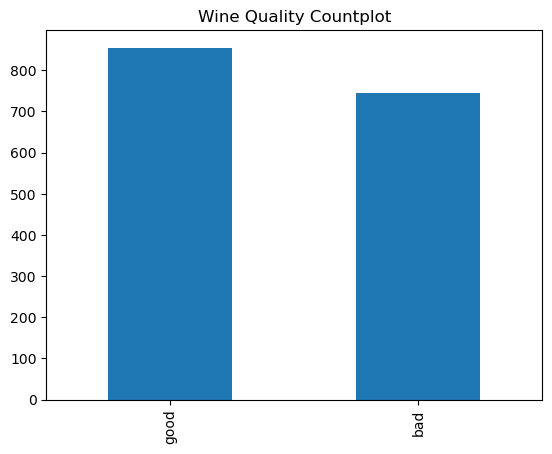

In [8]:
df['quality'].value_counts().plot(kind='bar',title='Wine Quality Countplot')

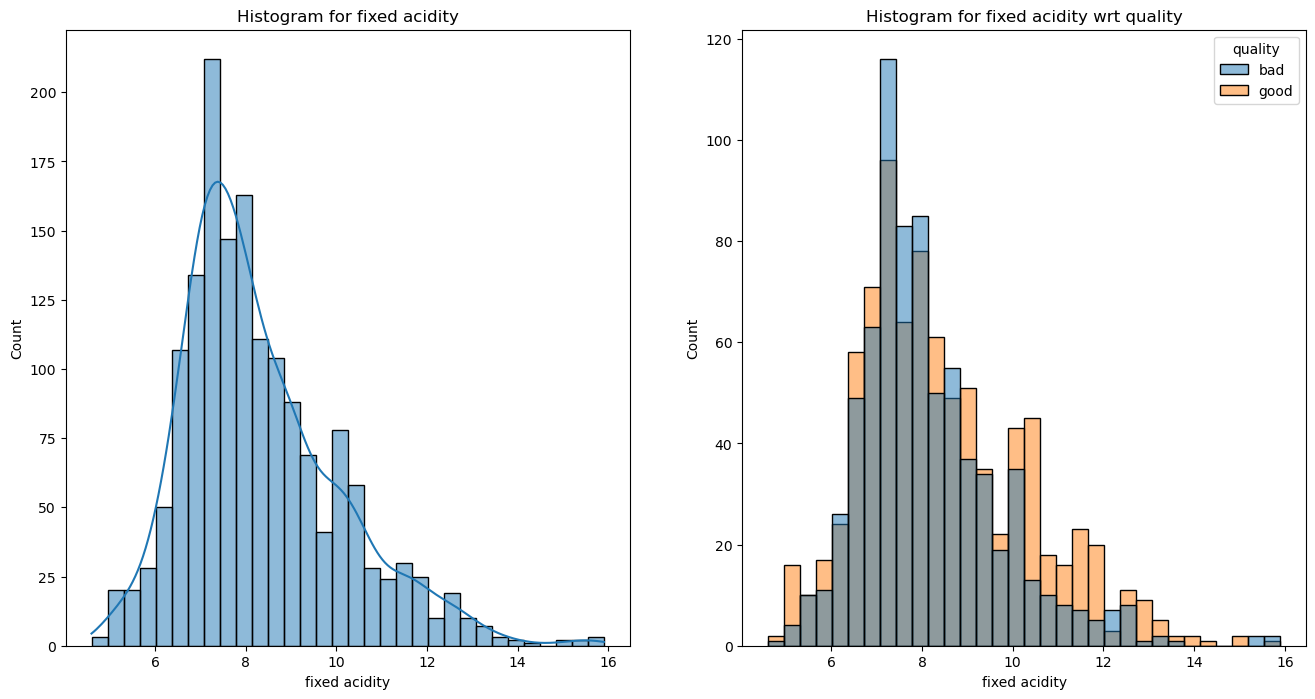

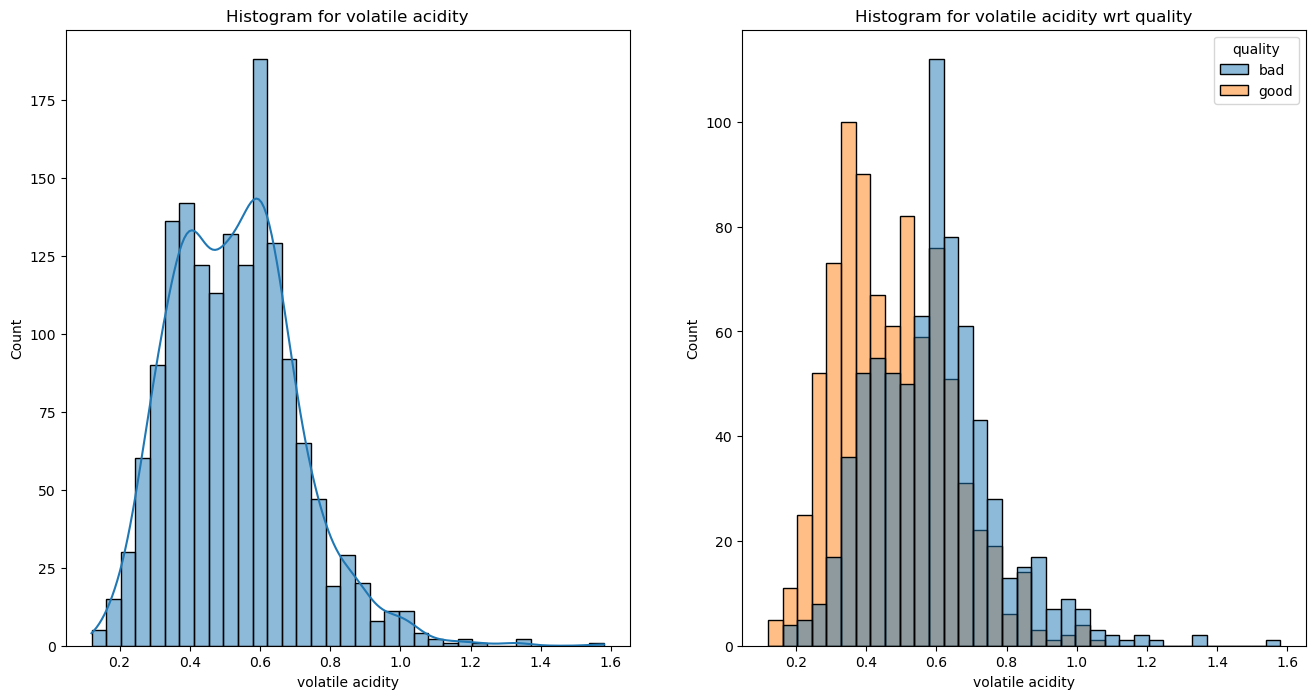

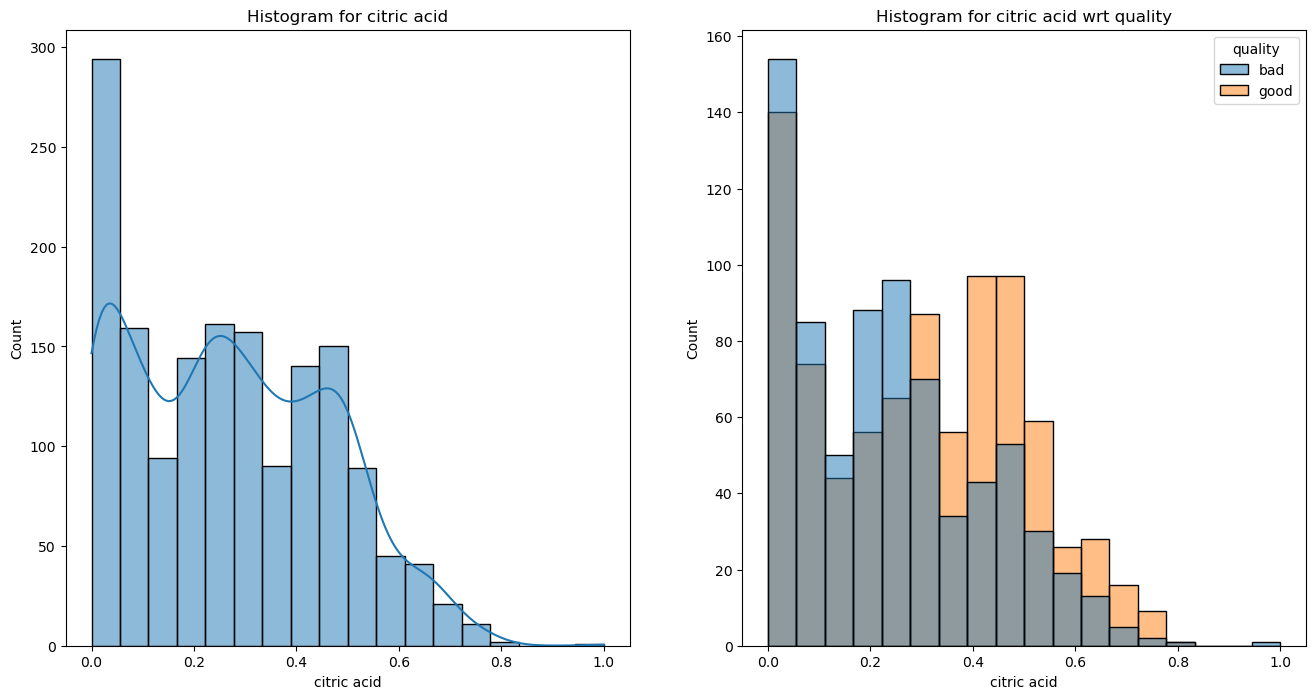

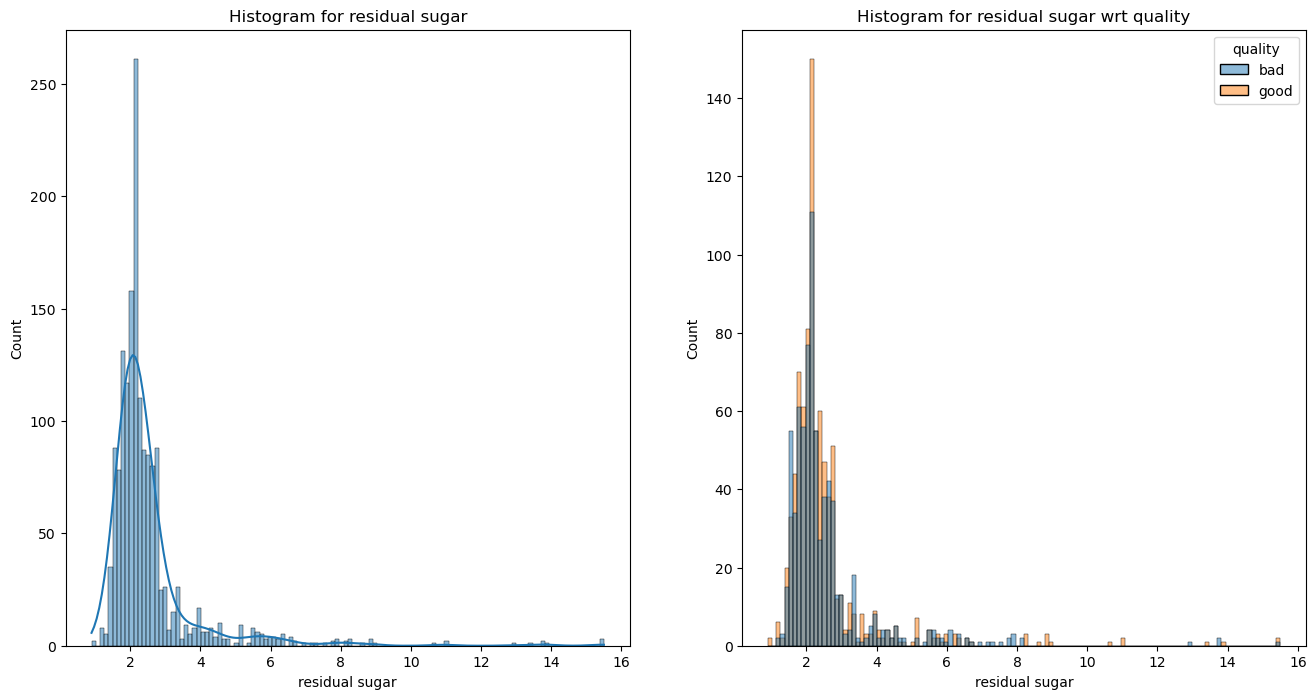

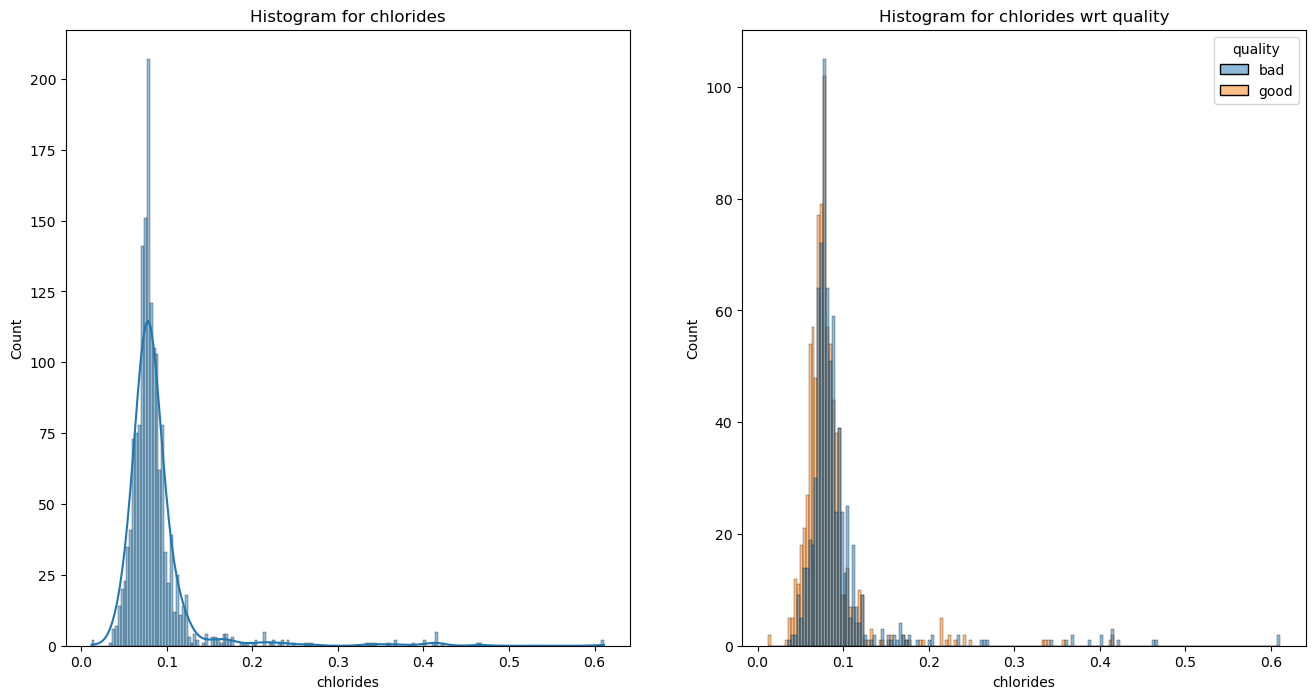

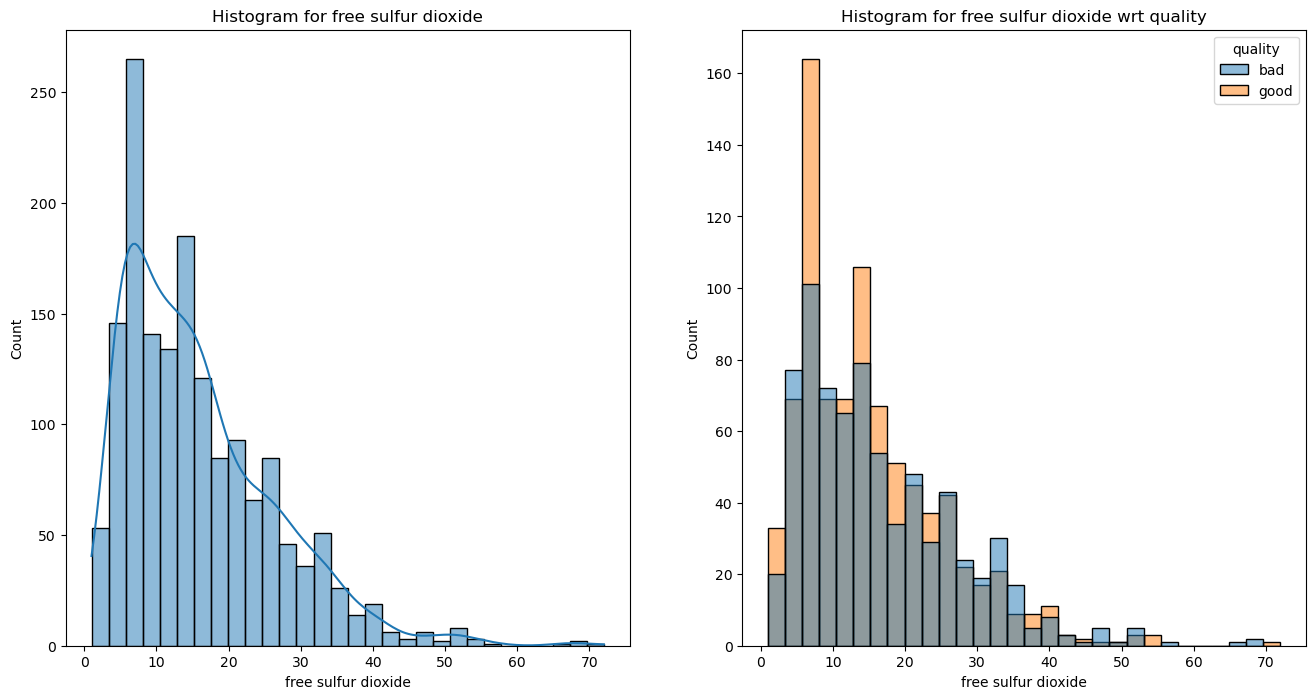

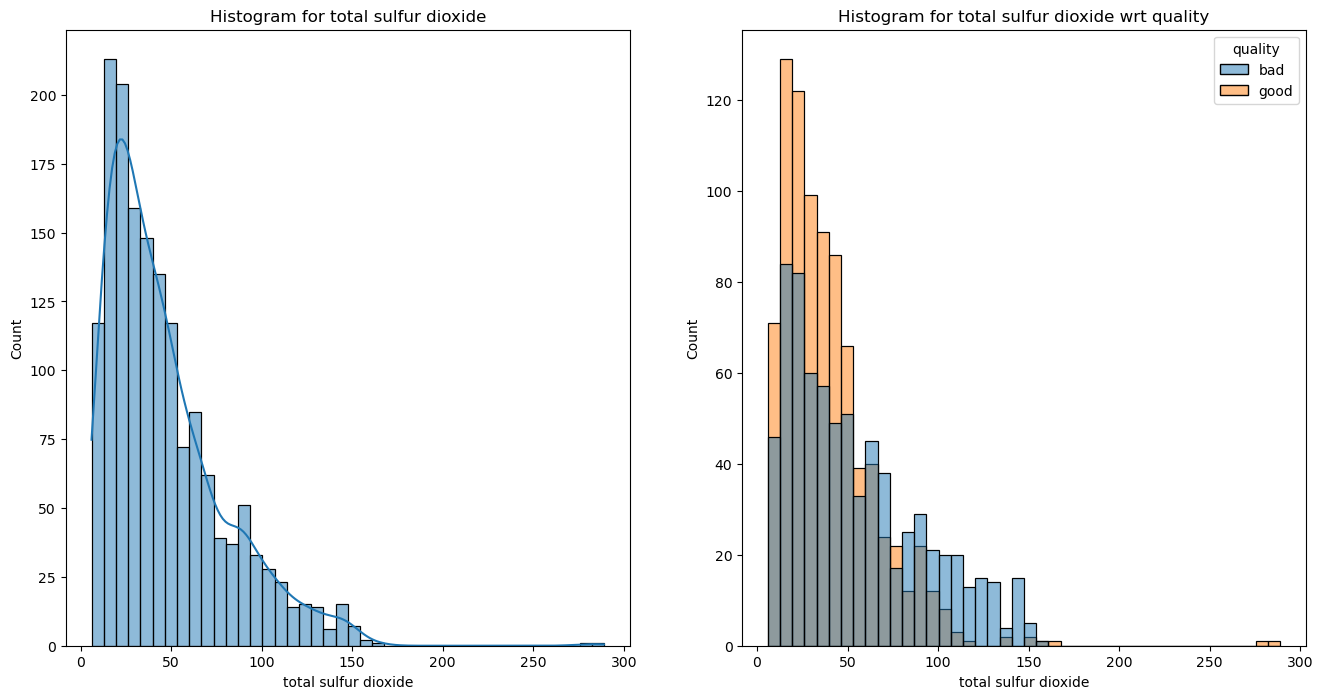

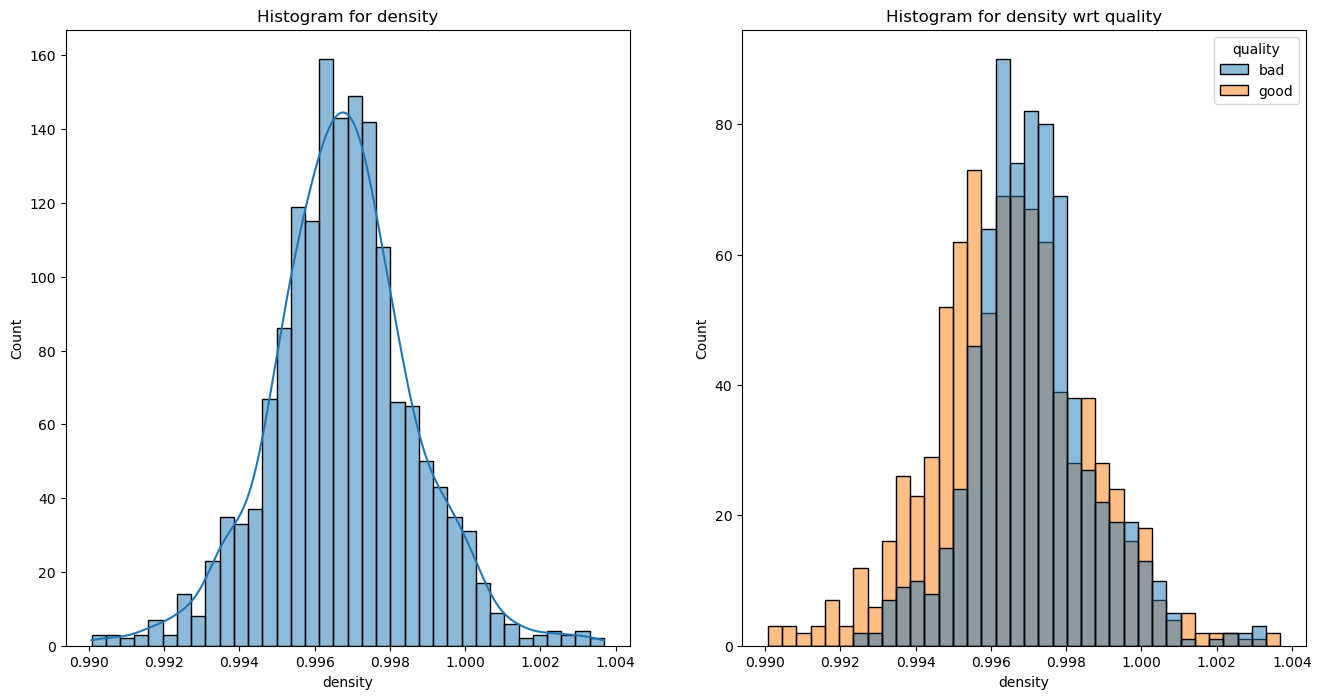

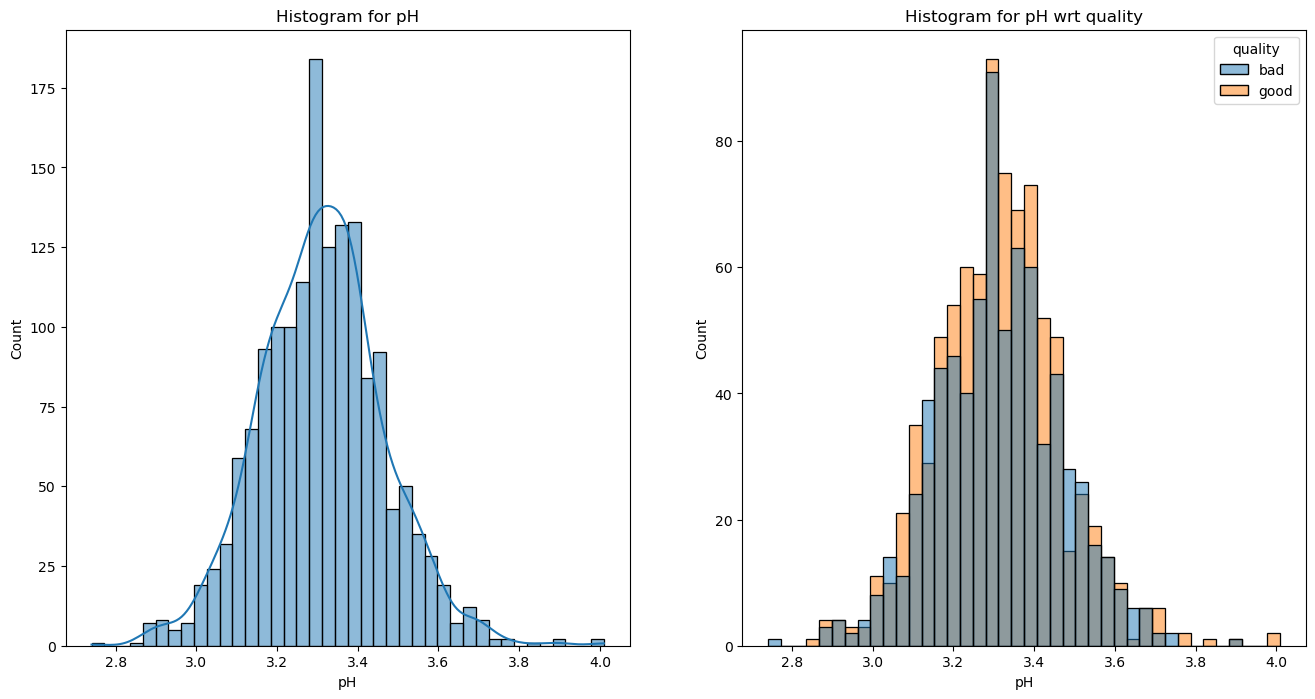

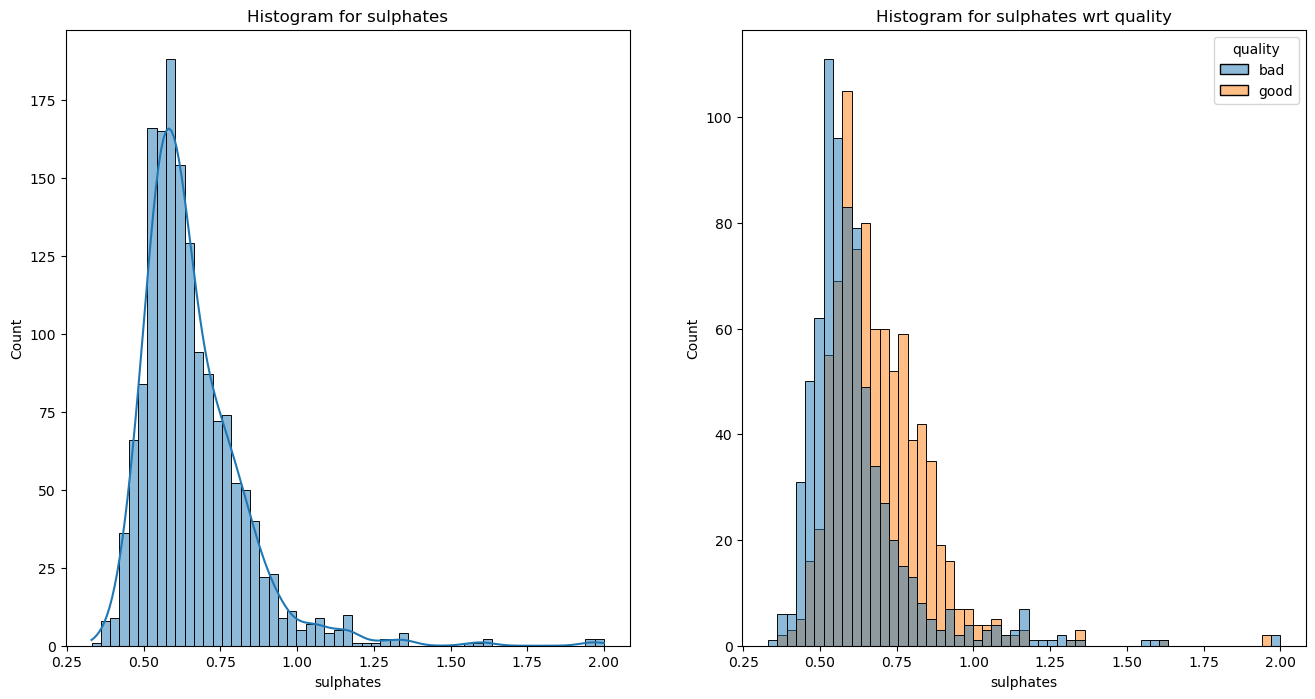

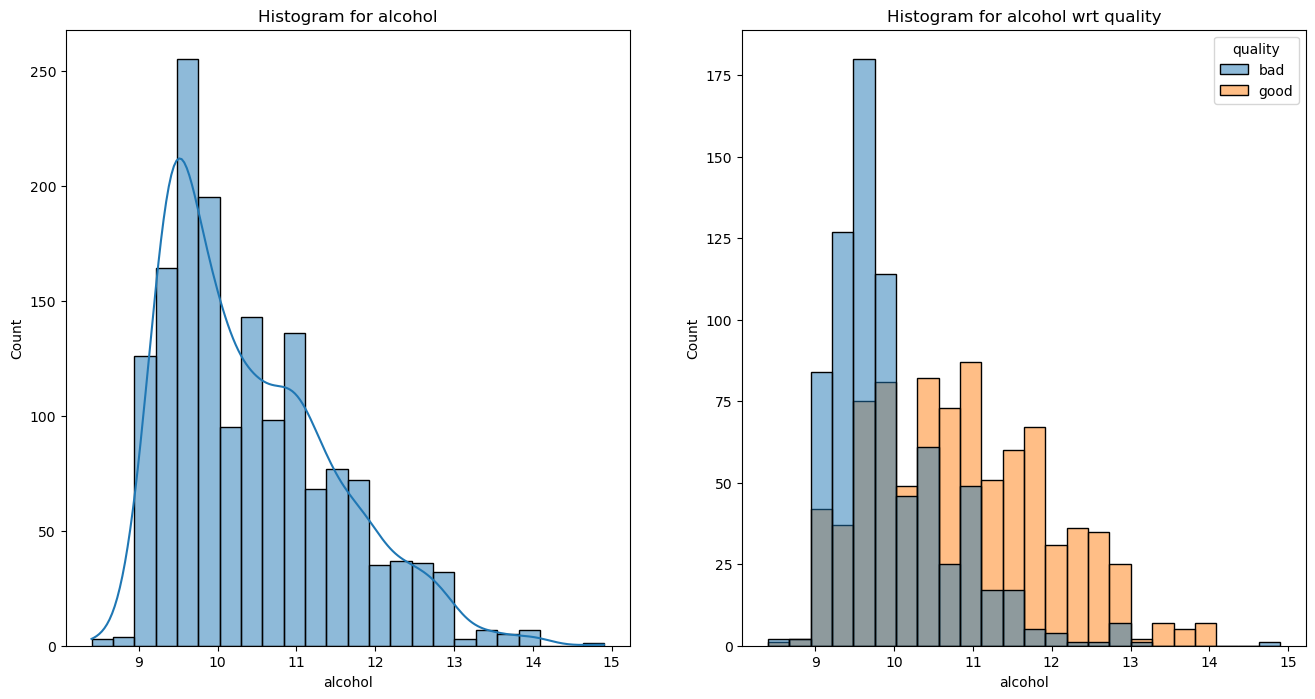

In [9]:
# Histograms for continious features
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    if df[i].dtypes !='object':
        plt.figure(figsize=(16,8))
        plt.subplot(1,2,1)
        sns.histplot(data=df,x=i,kde=True)
        plt.title(f'Histogram for {i}')
        
        plt.subplot(1,2,2)
        sns.histplot(data=df,x=i,hue='quality')
        plt.title(f'Histogram for {i} wrt quality')
        
        plt.show()

In [10]:
# Correalation heatmap
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   

                       alcohol  
fixed acidity        -0.061668  
volatile acidity     -0.202288  
citric acid           0.109903  
residual sugar        0.042075  
chlorides            -0.221141  
free sulfur dioxide  -0.069408  
total sulfur dioxide -0.205654  
density              -0.496180  
pH                    0.205633  
sulphates             0.093595  
alcohol               1.000000

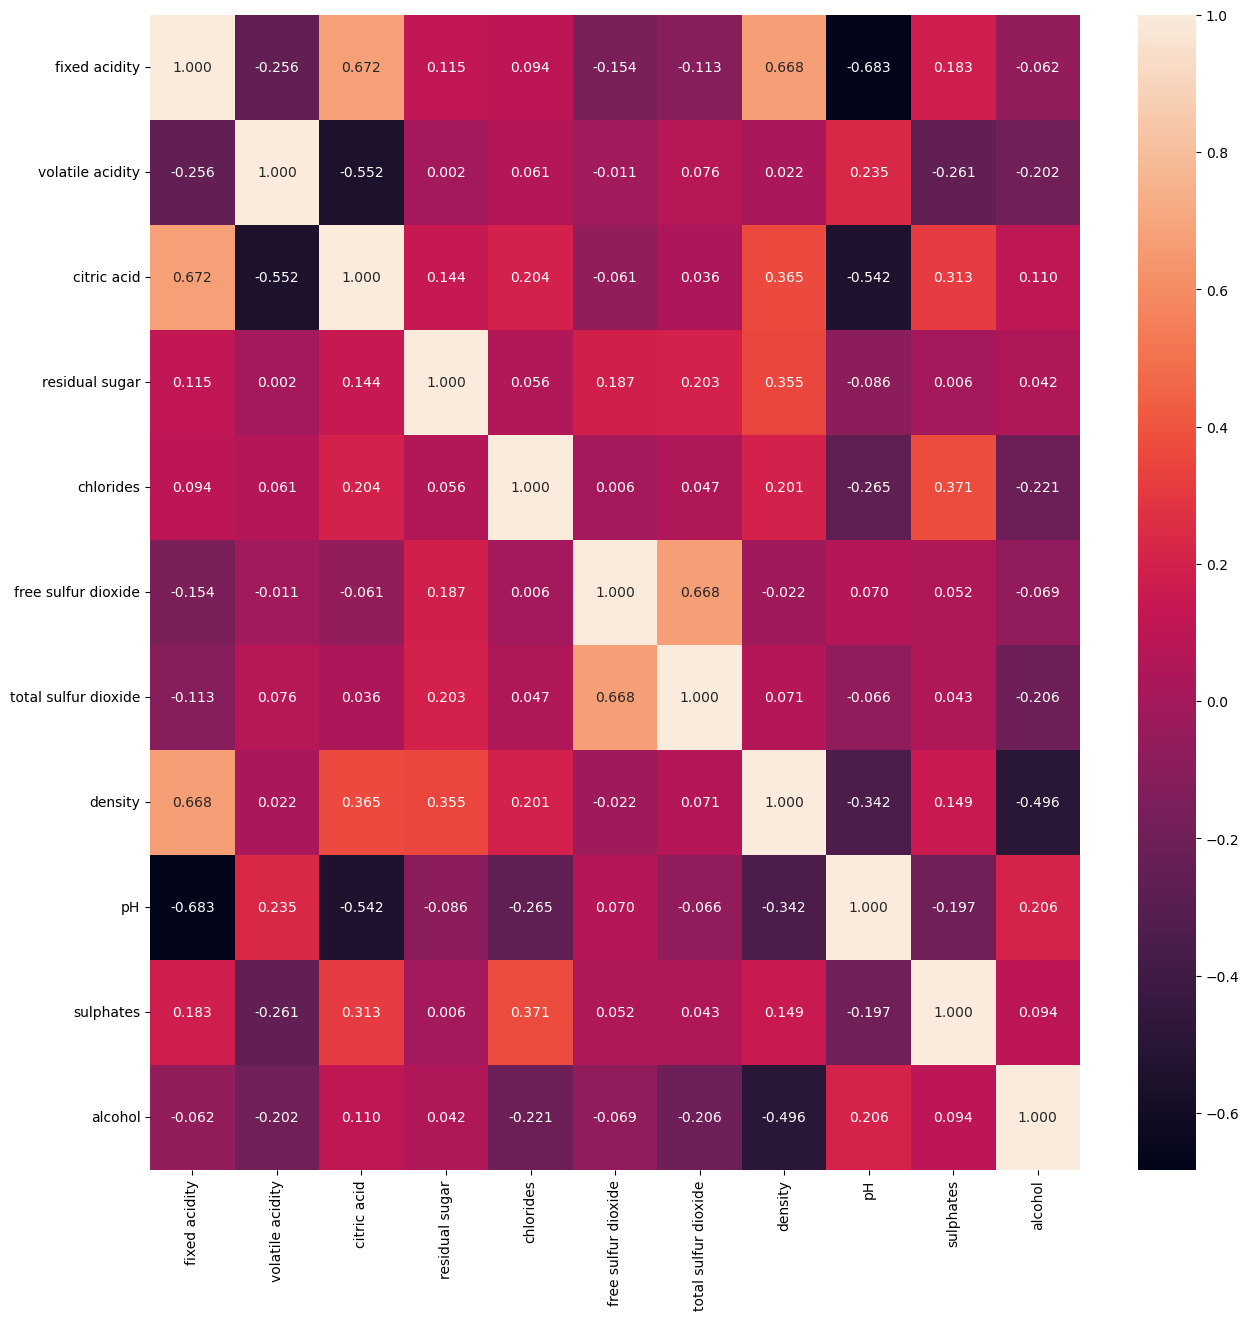

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='.3f')
plt.show()

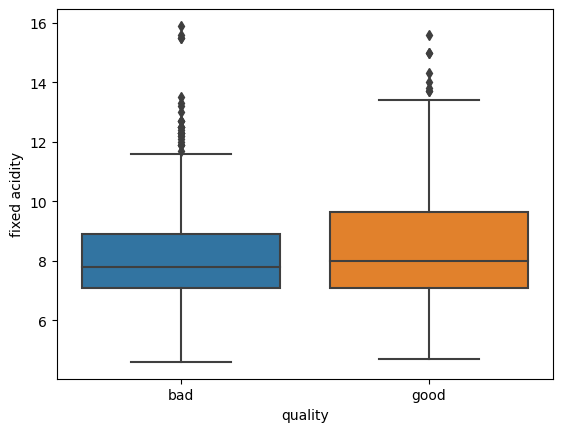

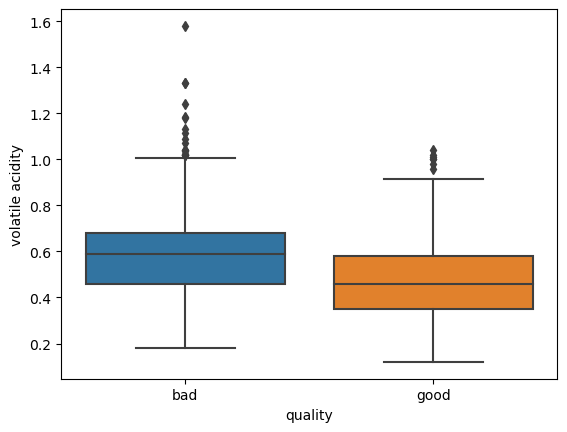

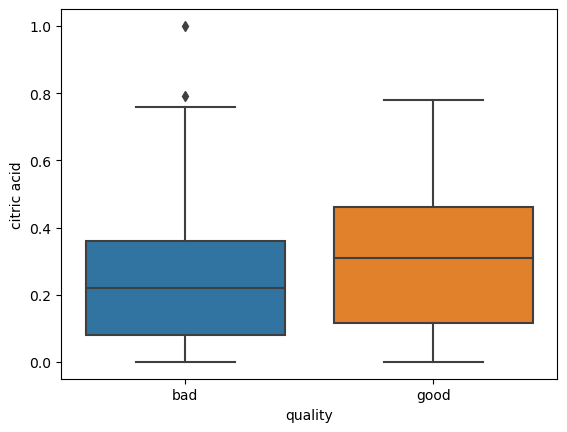

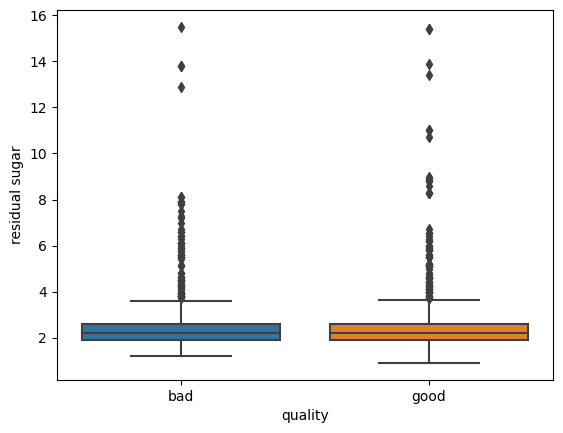

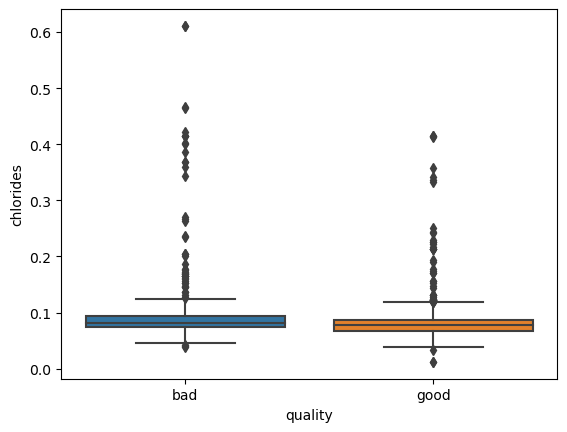

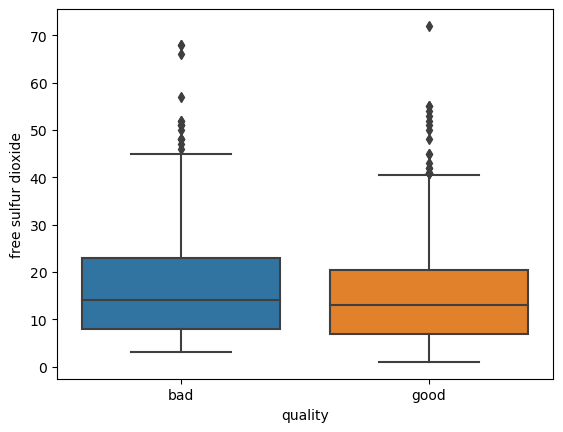

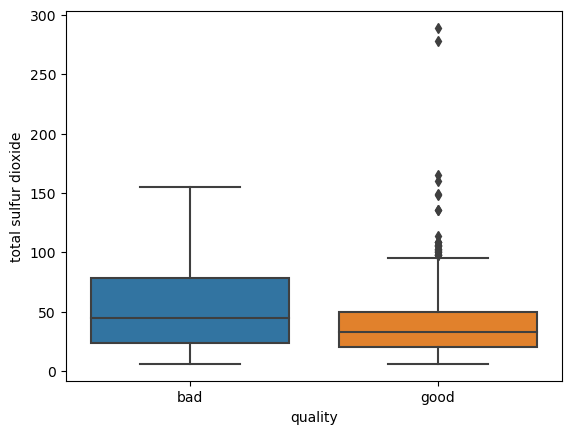

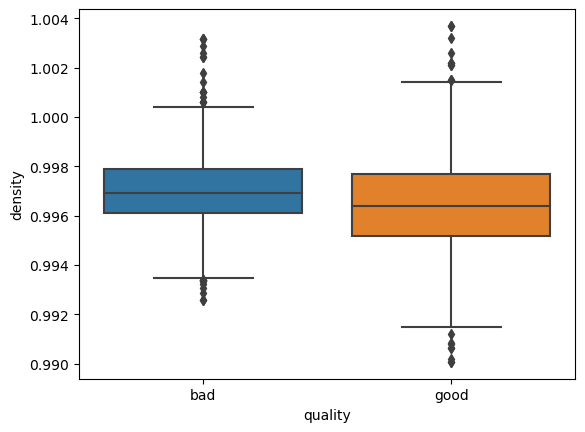

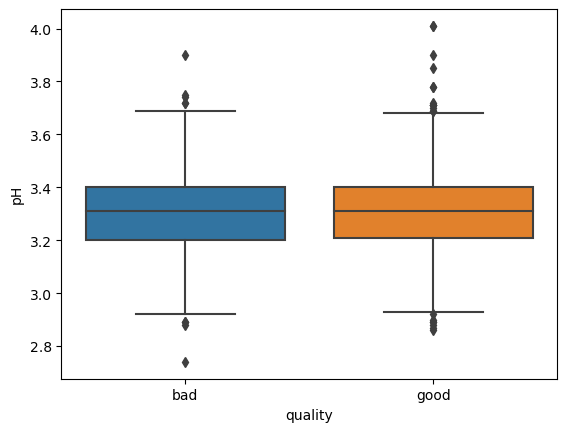

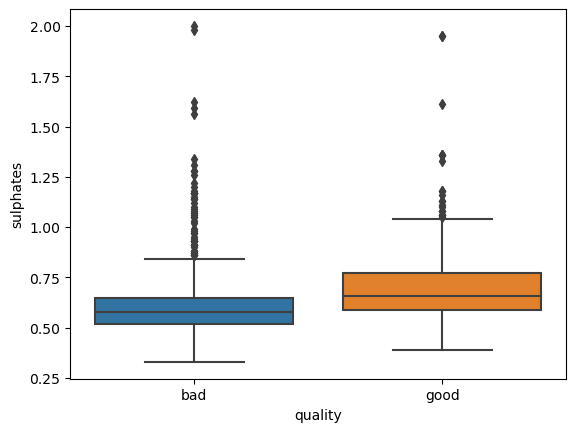

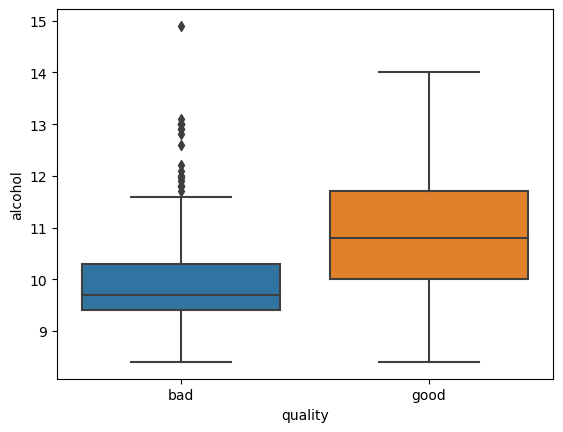

In [12]:
# Box plot wrt wine quality
for i in df.columns:
    if df[i].dtypes != 'object':
        sns.boxplot(data=df,x='quality',y=i)
        plt.show()

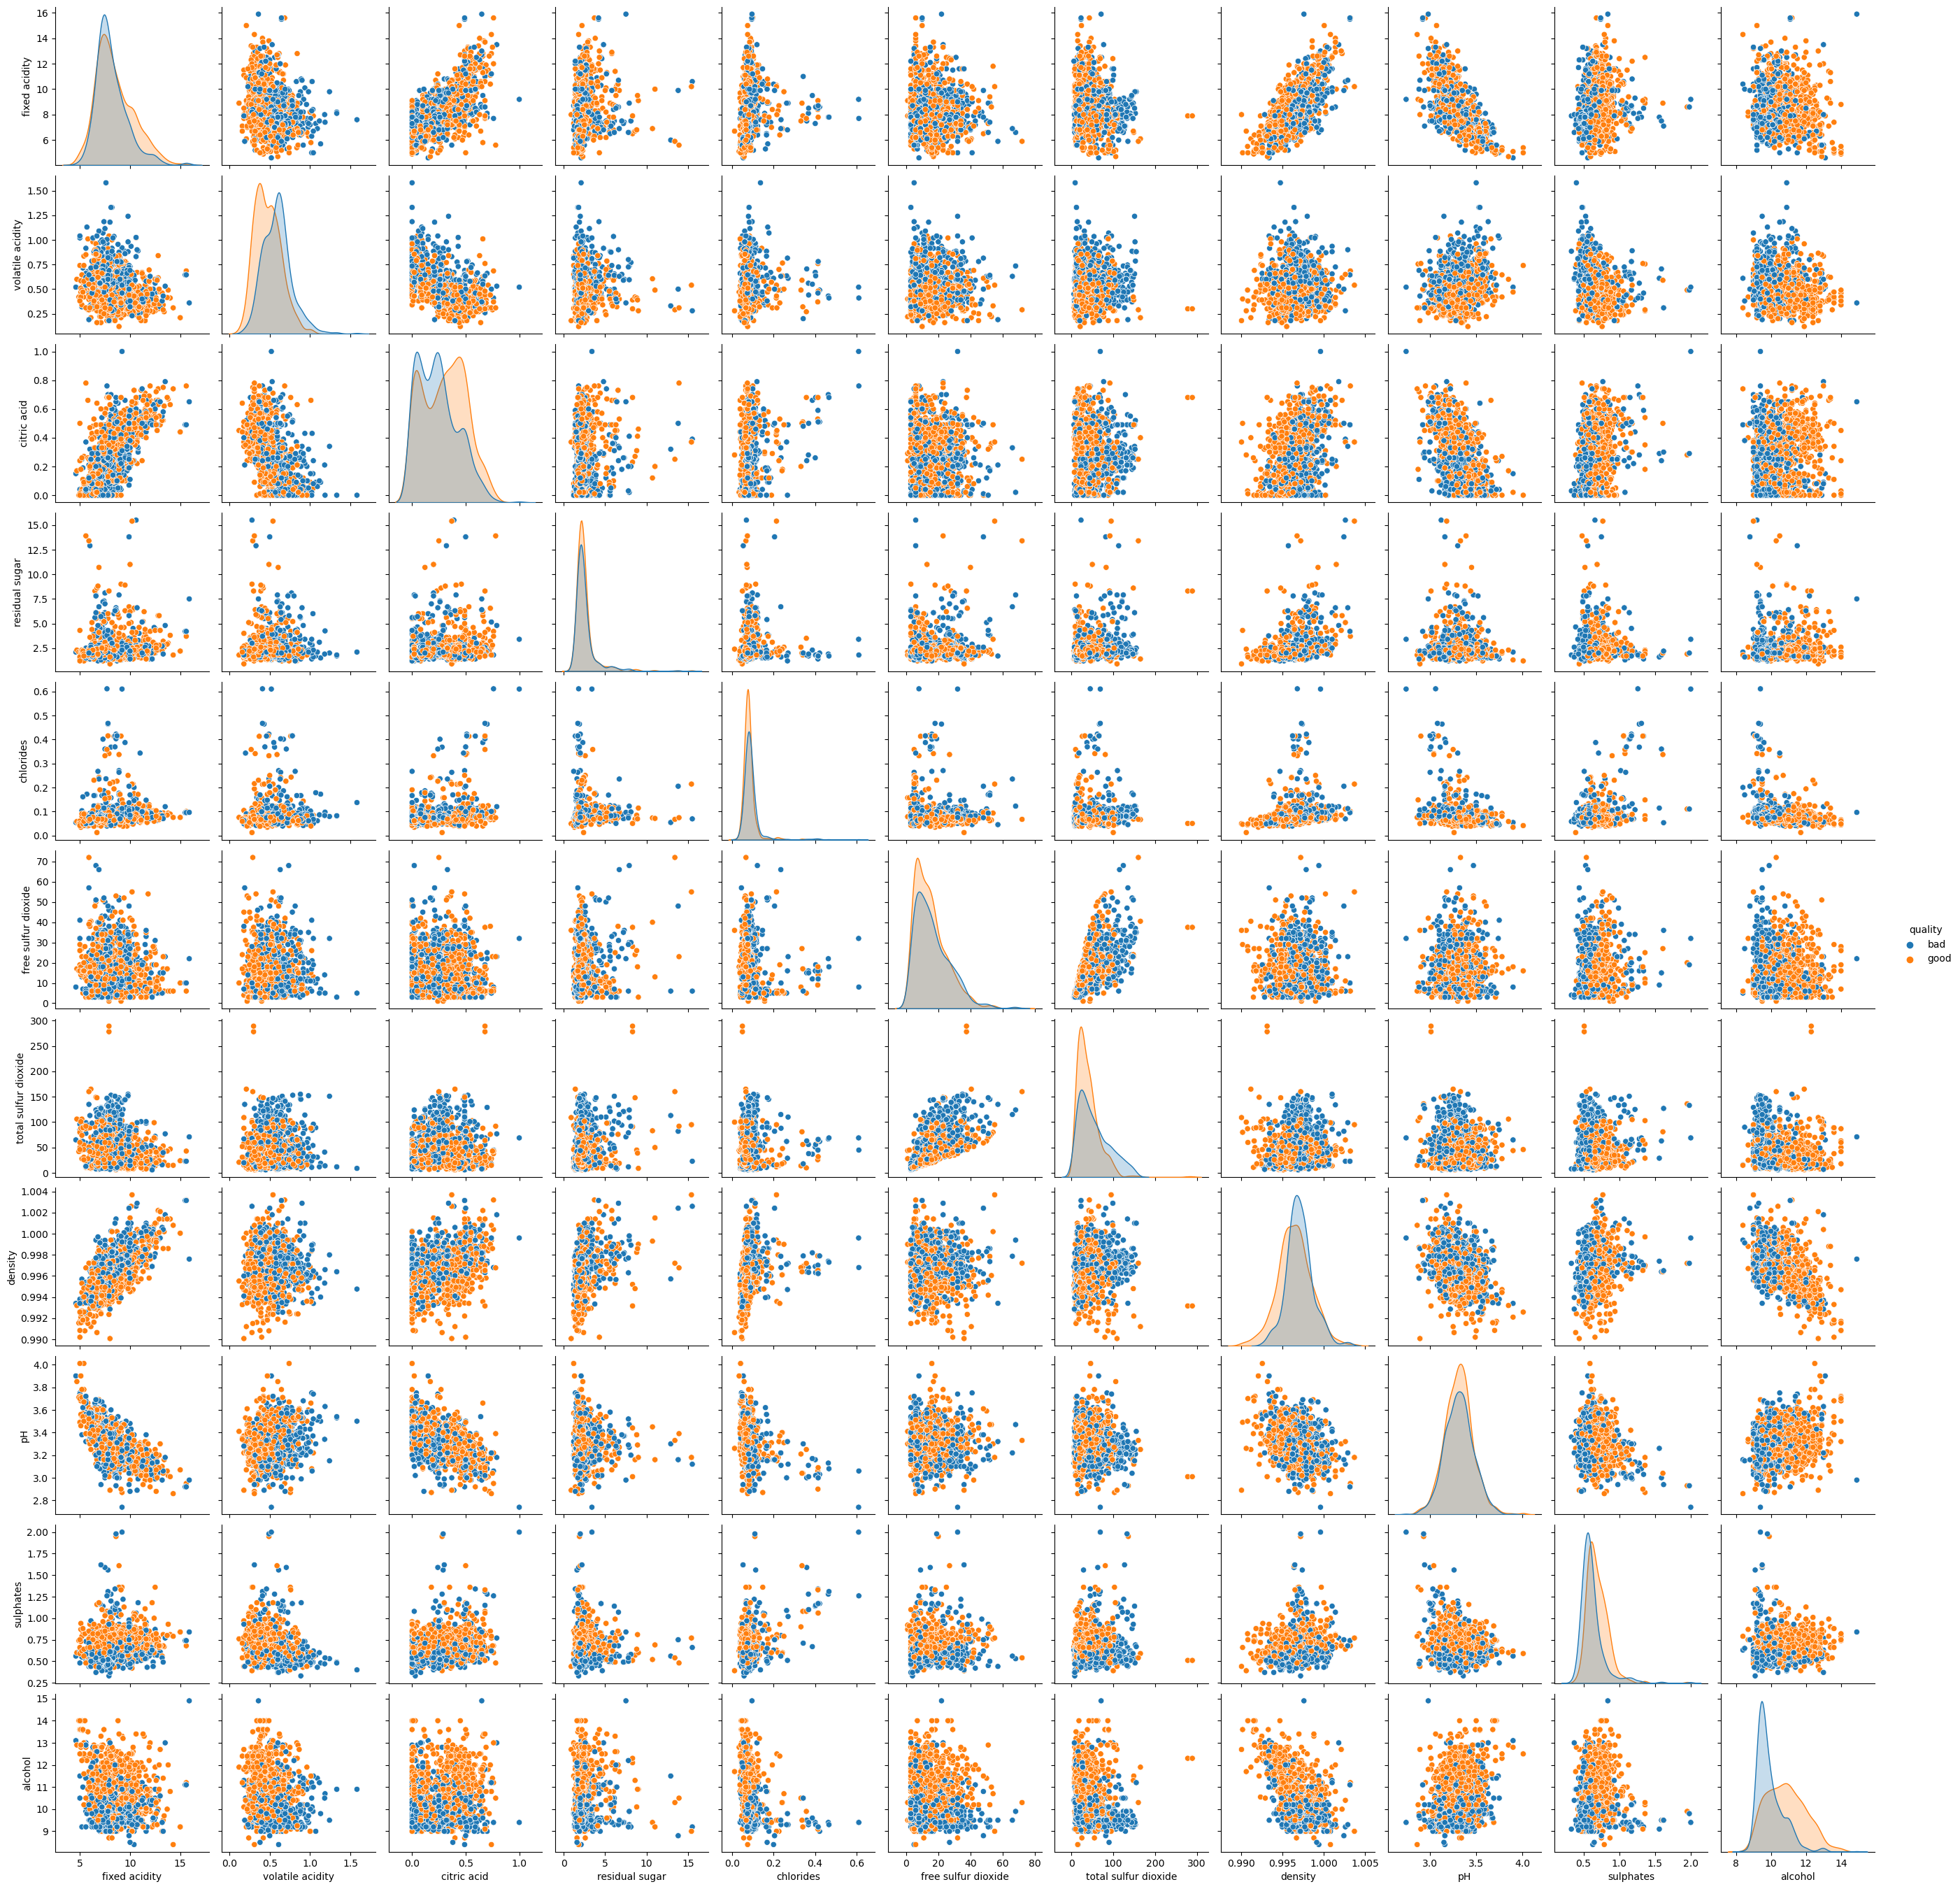

In [13]:
# Multivariate Analysis
sns.pairplot(data=df,hue='quality')


# checking missing value

In [14]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Categorical Features
df.columns[df.dtypes=='object']

Index(['quality'], dtype='object')

In [16]:
# Label Encoding the quality column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])

In [17]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        1  
4      9.4        0

In [18]:
# checking duplicated values
df.duplicated().sum()

240

In [19]:
df = df.drop_duplicates(keep="first")

In [20]:
df.shape

(1359, 12)

# Seperate the features and target variables from the dataframe

In [21]:
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]

In [22]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
5      9.4

In [23]:
Y.head()

quality
0        0
1        0
2        0
3        1
5        0

# Perform Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [25]:
xtrain.shape

(1087, 11)

In [26]:
xtest.shape

(272, 11)

# Perform scaling on the dataset

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain_scl = pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtest_scl = pd.DataFrame(ss.transform(xtest),columns=xtest.columns)

In [28]:
xtrain_scl.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.654091         -0.717880     1.026887       -0.011057  -0.024613   
1       1.061839         -0.444940    -0.197381       -0.453466  -0.126650   
2      -0.569154          0.701408    -1.370637       -0.379731  -0.085835   
3       0.770590         -0.608704     0.414753       -0.305996  -0.106243   
4      -0.976903          1.902345    -1.166593       -0.232261  -0.453170   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.943802             -0.818557  0.552633 -1.026696  -0.910081   
1            -0.566732             -0.879087  0.563406 -0.581662  -0.066196   
2            -0.943802             -0.727762  0.865036  1.897814   1.677832   
3             0.093140             -0.273790 -0.255304 -0.518085  -0.009937   
4            -0.378197             -0.818557 -0.179897  1.389204  -0.572527   

    alcohol  
0  0.072941  
1 -1.049919  
2 -0.488489  
3  0.634370  
4 -0.488489

In [29]:
xtest_scl.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.860403         -0.335764    -0.962548       -0.232261  -0.493985   
1      -0.336155         -0.772468    -0.758503       -0.600936   0.179462   
2       0.770590          0.810584    -0.146370       -0.232261  -0.024613   
3      -0.394405          1.356465    -1.370637       -0.600936  -0.249095   
4      -0.627404         -0.062824    -1.013559       -0.822141  -0.289910   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.187408             -0.273790 -0.626956 -0.073051  -0.066196   
1             0.281675             -0.606703 -0.395347 -0.963120  -0.966340   
2            -1.038070             -0.576438  1.134348 -1.090272  -0.347491   
3             1.601420             -0.061936 -0.309167 -0.009475  -0.234973   
4            -1.038070             -0.818557  0.326411  0.054101   0.833947   

    alcohol  
0 -0.769204  
1 -0.956348  
2 -0.207774  
3  0.260084  
4 -0.769204

# Create hidden layers and an output  layer for the binary categorical variables

In [30]:
from keras.layers import Dense, Dropout, BatchNormalization

In [31]:
layer1 = Dense(128,input_dim=xtrain.shape[1],activation='relu')
layer2 = BatchNormalization()
layer3 = Dropout(0.2)

layer4 = Dense(64,activation='relu')
layer5 = BatchNormalization()
layer6 = Dropout(0.2)

output = Dense(1,activation='sigmoid')

# Create a Sequential model and add all the layers to it

In [32]:
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(output)

# Implement a TensorBoard callback to visualize and monitor the model's training process.

In [34]:
from keras.callbacks import TensorBoard

log_dir = "logs/"  # Choose a directory where TensorBoard will save logs and events

# Create the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [35]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

# implement a ModelCheckpoint callback to save the best model based on a chosen metric during training

In [36]:
from keras.callbacks import ModelCheckpoint
# Define the checkpoint path where the best model will be saved
checkpoint_path = "model/best_model.h5"

# Create the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',  # Choose the metric to monitor for saving the best model
    mode='min',          # Set 'max' if the metric should be maximized (e.g., accuracy)
    save_best_only=True, # Only save the best model (True: overwrite the previous best model)
    verbose=1            # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch.
)

# print the model Summary

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

# Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy']

In [38]:
loss = 'binary_crossentropy'

In [39]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [40]:
metrics = ['accuracy']

# Compile the model with the specified loss function, optimizer, and metrics.

In [41]:
model.compile(loss=loss, optimizer=optimizer ,metrics=metrics)

# Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks. 

In [42]:
hist = model.fit(xtrain_scl, ytrain, validation_split=0.2, epochs=500, batch_size=64,
                 callbacks=[tensorboard_callback, early_stop, model_checkpoint_callback])

Epoch 1/500
 1/14 [=>............................] - ETA: 7s - loss: 0.9406 - accuracy: 0.5312
Epoch 1: val_loss improved from inf to 0.66876, saving model to model\best_model.h5
14/14 [==============================] - 1s 24ms/step - loss: 0.8511 - accuracy: 0.5535 - val_loss: 0.6688 - val_accuracy: 0.6055
Epoch 2/500
 1/14 [=>............................] - ETA: 0s - loss: 0.7957 - accuracy: 0.6094
Epoch 2: val_loss improved from 0.66876 to 0.65983, saving model to model\best_model.h5
14/14 [==============================] - 0s 10ms/step - loss: 0.7889 - accuracy: 0.5777 - val_loss: 0.6598 - val_accuracy: 0.6284
Epoch 3/500
 1/14 [=>............................] - ETA: 0s - loss: 0.5941 - accuracy: 0.7500
Epoch 3: val_loss improved from 0.65983 to 0.65278, saving model to model\best_model.h5
14/14 [==============================] - 0s 9ms/step - loss: 0.7159 - accuracy: 0.6272 - val_loss: 0.6528 - val_accuracy: 0.6560
Epoch 4/500
 1/14 [=>............................] - ETA: 0s - los

# Get the model's parameters

In [43]:
model.get_build_config()

{'input_shape': (None, 11)}

In [44]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization',
    'trainable': True,
    'dtype': 'float32',
    'axis': ListWrapper([1]),
    'momentum': 0.99,
    'epsilon': 0.001,
    'center': True,
    'scale': True,
    'beta_initializer': {'class_

In [45]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.5374598>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.73394495>}

# Store the Model's training history as a pandas Dataframe

In [46]:
dct = {'loss':hist.history['loss'],
       'val_loss':hist.history['val_loss'],
       'accuracy':hist.history['accuracy'],
       'val_accuracy':hist.history['val_accuracy']}

In [47]:
df_history = pd.DataFrame(dct)
df_history

loss  val_loss  accuracy  val_accuracy
0   0.851114  0.668762  0.553510      0.605505
1   0.788895  0.659834  0.577675      0.628440
2   0.715874  0.652777  0.627158      0.655963
3   0.718370  0.646109  0.643268      0.642202
4   0.672696  0.640148  0.646720      0.655963
5   0.666062  0.633965  0.670886      0.655963
6   0.612691  0.628974  0.689298      0.651376
7   0.621045  0.622809  0.681243      0.651376
8   0.592616  0.616223  0.720368      0.669725
9   0.569603  0.610320  0.712313      0.669725
10  0.604416  0.604337  0.706559      0.678899
11  0.550148  0.599076  0.723821      0.683486
12  0.581005  0.593433  0.715765      0.692661
13  0.587246  0.586211  0.710011      0.711009
14  0.559869  0.580941  0.744534      0.706422
15  0.581511  0.575091  0.708861      0.715596
16  0.575308  0.570530  0.716916      0.711009
17  0.575734  0.564412  0.712313      0.720183
18  0.578350  0.560602  0.714615      0.720183
19  0.561940  0.556763  0.720368      0.720183
20  0.558080  0.552647  0.726122      0.715596
21  0.550619  0.549271  0.724971      0.738532
22  0.535249  0.548377  0.733026      0.729358
23  0.565925  0.544721  0.722670      0.738532
24  0.537906  0.543987  0.726122      0.729358
25  0.545845  0.544189  0.754891      0.729358
26  0.531098  0.541514  0.744534      0.729358
27  0.551128  0.539067  0.724971      0.729358
28  0.539166  0.538302  0.745685      0.733945
29  0.527366  0.536161  0.747986      0.729358
30  0.555049  0.539070  0.731876      0.724771
31  0.526847  0.540420  0.744534      0.724771
32  0.532240  0.540572  0.751438      0.724771
33  0.526463  0.539427  0.745685      0.724771
34  0.527677  0.538947  0.739931      0.733945
35  0.515145  0.538198  0.767549      0.733945
36  0.497698  0.538153  0.751438      0.729358
37  0.511509  0.535347  0.743383      0.733945
38  0.506708  0.535731  0.762946      0.733945
39  0.508405  0.536704  0.747986      0.738532
40  0.528736  0.536443  0.734177      0.738532
41  0.514243  0.536794  0.747986      0.733945
42  0.505239  0.538572  0.757192      0.733945
43  0.498303  0.538595  0.751438      0.733945
44  0.503830  0.538288  0.753740      0.733945
45  0.501304  0.537703  0.753740      0.733945
46  0.515912  0.536781  0.742232      0.733945
47  0.500172  0.537460  0.754891      0.733945

# plot the model's training history

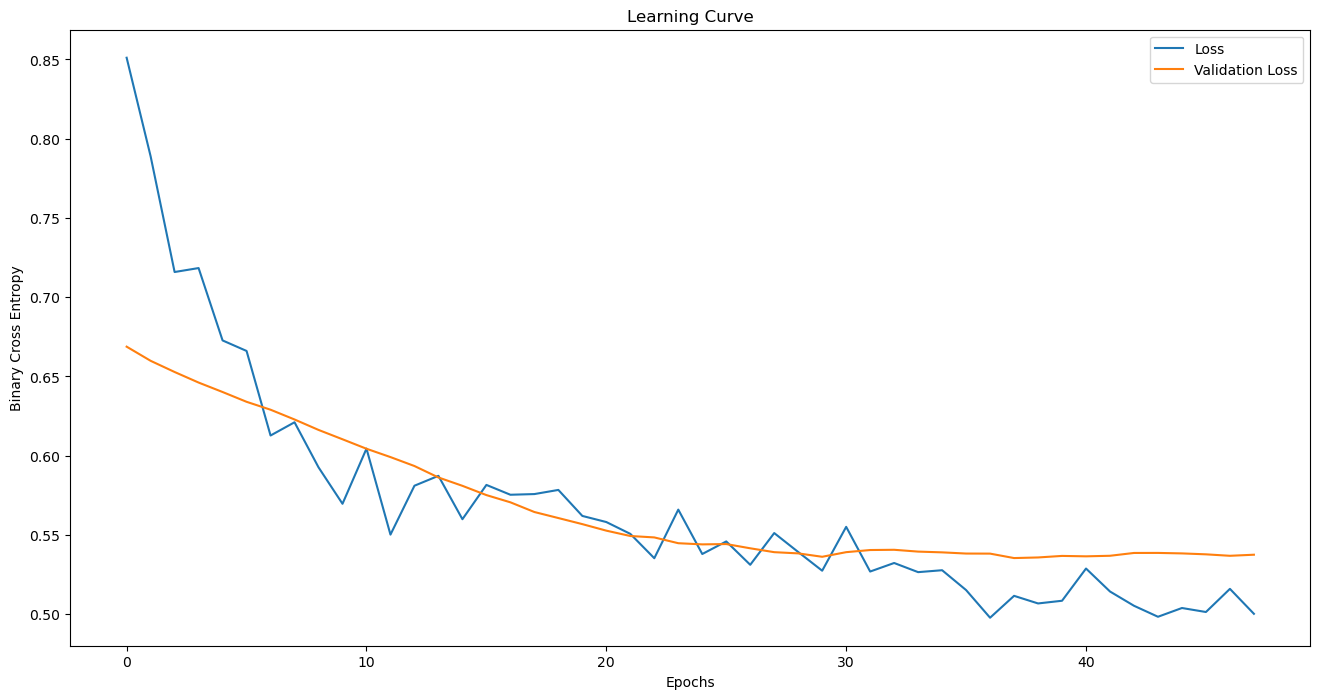

In [48]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Evaluate the model's performance using the test data

In [49]:
# Model Accuracy
ts_loss,ts_acc = model.evaluate(xtest_scl,ytest)
print(f'Testing Binrary Cross Entropy Loss : {ts_loss:.4f}')
print(f'Testing Accuracy : {ts_acc:.4f}')

9/9 [==============================] - 0s 1ms/step - loss: 0.5114 - accuracy: 0.7537
Testing Binrary Cross Entropy Loss : 0.5114
Testing Accuracy : 0.7537


In [50]:
# Predicting test data
ts_prob = model.predict(xtest_scl)
ts_prob[0:5]

9/9 [==============================] - 0s 1ms/step


array([[0.55456716],
       [0.5288866 ],
       [0.57377076],
       [0.53400576],
       [0.7562351 ]], dtype=float32)

In [51]:
# Predict with threshold value of 0.5
thr = 0.5
ypred_ts = []
for i in ts_prob:
    if i>=0.5:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [52]:
ypred_ts[0:5]

[1, 1, 1, 1, 1]

In [53]:
ytest.head()

quality
1526        1
988         0
475         0
1046        1
658         1

In [54]:
ytest['quality'].value_counts()

1    136
0    136
Name: quality, dtype: int64

In [55]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       136
           1       0.74      0.77      0.76       136

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



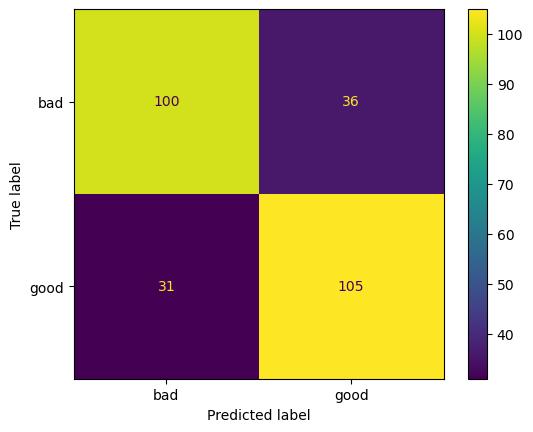

In [56]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=['bad','good'])
cfd.plot()

# above model is a good generalized